In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('tit.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
class_1=df['Survived']==1
class_2=df['Survived']==0

print(df[class_1].shape)
print(df[class_2].shape)

(342, 12)
(549, 12)


In [8]:
df[class_2].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            125
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          481
Embarked         0
dtype: int64

In [9]:
df[class_1].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             52
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

In [10]:
df.drop('Name',axis=1,inplace=True)

In [11]:
df.drop('PassengerId',axis=1,inplace=True)

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
null_drop=df.dropna()

In [14]:
null_drop.shape

(183, 10)

In [15]:
class_1=null_drop['Survived']==1
class_2=null_drop['Survived']==0

print(null_drop[class_1].shape)
print(null_drop[class_2].shape)

(123, 10)
(60, 10)


In [16]:
null_drop.skew()

Survived   -0.739427
Pclass      2.681459
Age         0.009676
SibSp       1.443019
Parch       1.519305
Fare        2.715883
dtype: float64

In [17]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [18]:
plt.rcParams['figure.figsize']=(10,15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B416E35D68>,
      dtype=object)

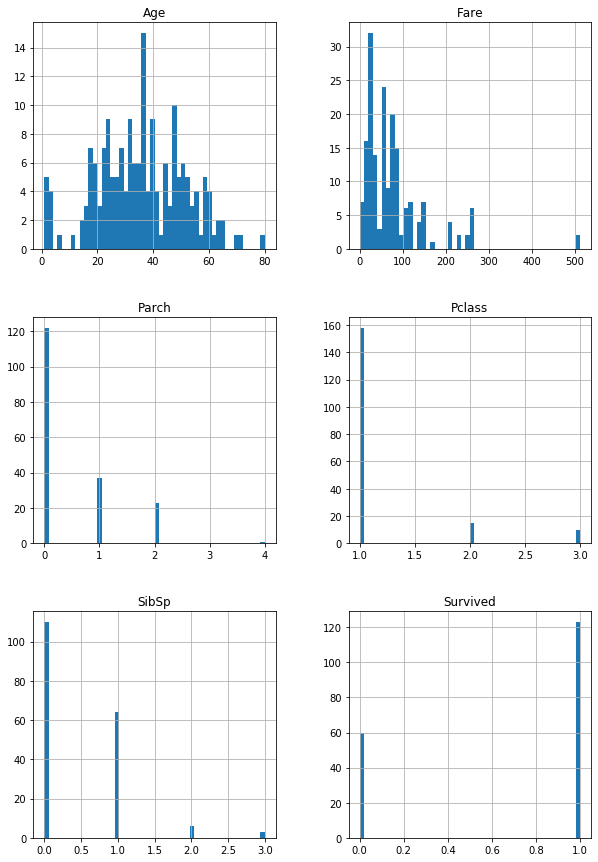

In [19]:
null_drop.hist(bins=50)

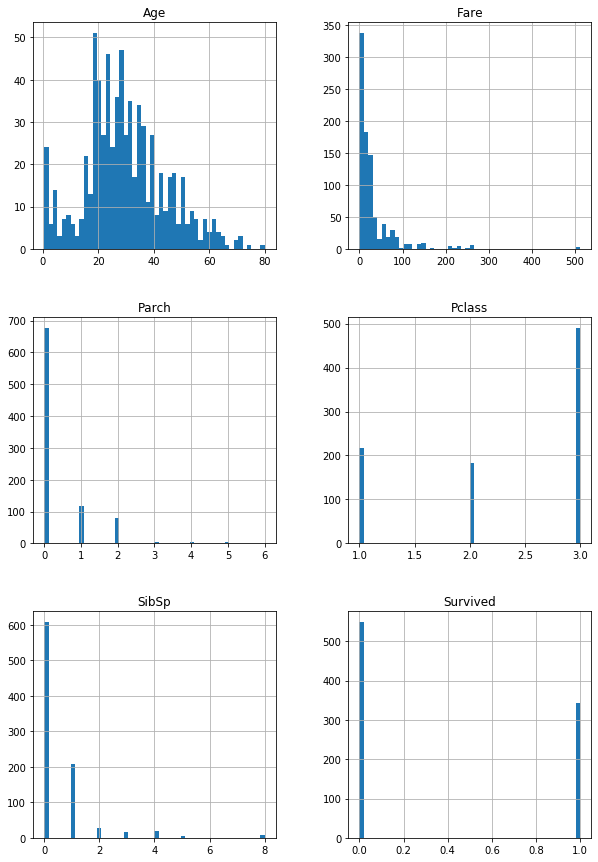

In [20]:
hist=df.hist(bins=50)

In [21]:
null_drop.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [22]:
data=null_drop

In [23]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
data['Cabin']=le.fit_transform(data['Cabin']).reshape(-1,1)

C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
data['Embarked']=le.fit_transform(data['Embarked']).reshape(-1,1)

C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,72,0
3,1,1,female,35.0,1,0,113803,53.1000,48,2
6,0,1,male,54.0,0,0,17463,51.8625,117,2
10,1,3,female,4.0,1,1,PP 9549,16.7000,131,2
11,1,1,female,58.0,0,0,113783,26.5500,43,2


In [29]:
corr=data.corr()

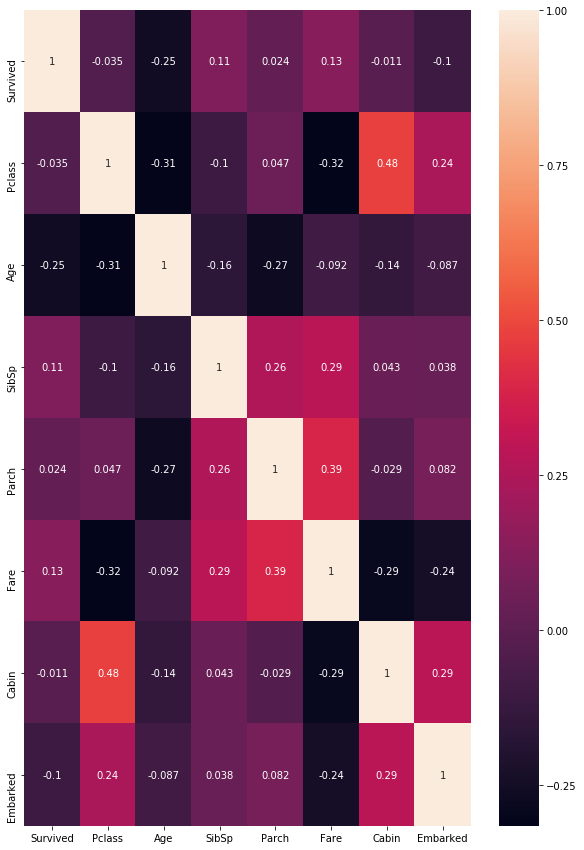

In [30]:
sns.heatmap(corr,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B417DD9048>,
      dtype=object)

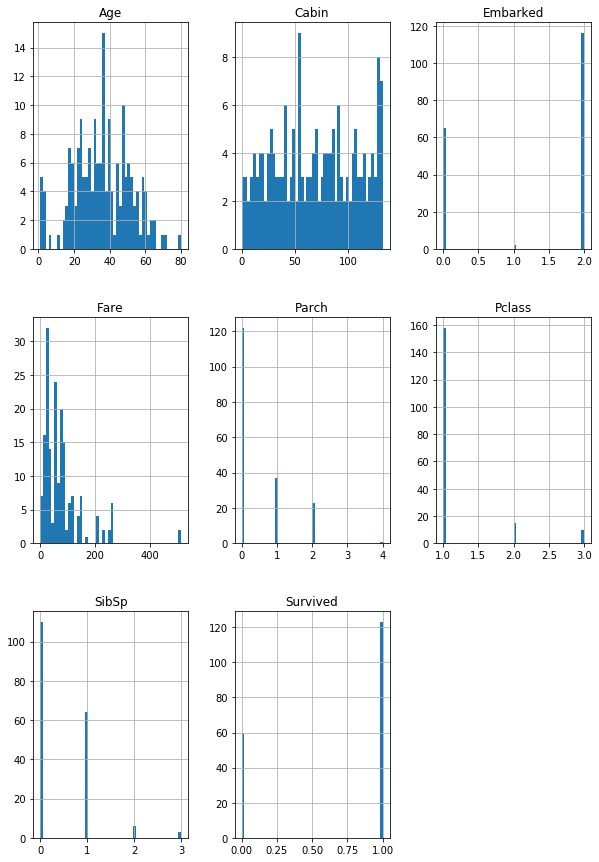

In [31]:
data.hist(bins=50)

In [32]:
from scipy.stats import zscore

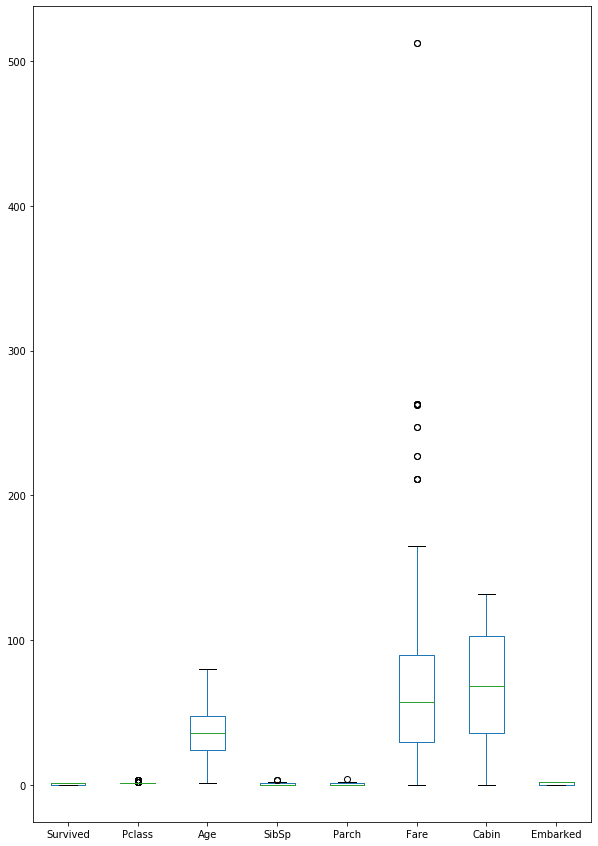

In [33]:
data.plot.box()

In [36]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [41]:
data.drop('Ticket',inplace=True,axis=1)

C:\Users\utkarsh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [55]:
data_f=data['Sex']=='female'

In [56]:
data_f.mean()

0.4808743169398907

In [57]:
data_m=data['Sex']=='male'

In [58]:
data_m.mean()

0.5191256830601093

In [52]:
data_f=data[data_f]

In [59]:
data_m=data[data_m]

In [53]:
data_sf=data_f['Survived']==1

In [54]:
data_sf.mean()

0.9318181818181818

In [60]:
data_sm=data_m['Survived']==1

In [61]:
data_sm.mean()

0.43157894736842106

In [63]:
data['Sex']=le.fit_transform(data['Sex']).reshape(-1,1)

C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
lr=LogisticRegression()

In [66]:
data.shape

(183, 9)

In [67]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,0,38.0,1,0,71.2833,72,0
3,1,1,0,35.0,1,0,53.1000,48,2
6,0,1,1,54.0,0,0,51.8625,117,2
10,1,3,0,4.0,1,1,16.7000,131,2
11,1,1,0,58.0,0,0,26.5500,43,2


In [68]:
x=data.iloc[:,1:9]

In [72]:
y=data.iloc[:,0].values.reshape(-1,1)

In [73]:
list=np.arange(0,100)

In [93]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=m)
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    ascore=accuracy_score(pred,ytest)
    if ascore>0.9:
        print(m,ascore)

69 0.9523809523809523


In [199]:
lr.coef_

array([[ 0.00499434,  0.00077238,  0.03762058, -0.51586561,  0.07288987]])

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=69)

In [111]:
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
ascore=accuracy_score(pred,ytest)
print(ascore)

0.9523809523809523


In [112]:
print(confusion_matrix(pred,ytest))

[[ 2  1]
 [ 0 18]]


In [97]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.95      1.00      0.97        18

    accuracy                           0.95        21
   macro avg       0.97      0.83      0.89        21
weighted avg       0.95      0.95      0.95        21



In [98]:
gb=GaussianNB()

In [105]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=m)
    gb.fit(xtrain,ytrain)
    pred_gb=gb.predict(xtest)
    ascore=accuracy_score(pred_gb,ytest)
    if ascore>0.9:
        print(m,ascore)

24 0.9047619047619048
63 0.9523809523809523
72 0.9047619047619048
88 0.9523809523809523


In [162]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=31,random_state=63)
gb.fit(xtrain,ytrain)
pred_gb=gb.predict(xtest)
ascore=accuracy_score(pred_gb,ytest)
print(ascore)
print(confusion_matrix(pred_gb,ytest))
print(classification_report(pred_gb,ytest))

0.9354838709677419
[[12  1]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        18

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



In [114]:
dtc=DecisionTreeClassifier()

In [164]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=31,random_state=m)
    dtc.fit(xtrain,ytrain)
    pred_dtc=dtc.predict(xtest)
    ascore=accuracy_score(pred_dtc,ytest)
    if ascore>0.9:
        print(m,ascore)

31 0.9032258064516129
43 0.9032258064516129


In [165]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=31,random_state=43)
dtc.fit(xtrain,ytrain)
pred_dtc=dtc.predict(xtest)
ascore=accuracy_score(pred_dtc,ytest)
print(ascore)
print(confusion_matrix(pred_dtc,ytest))
print(classification_report(pred_dtc,ytest))

0.9032258064516129
[[ 9  2]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.90      0.95      0.93        20

    accuracy                           0.90        31
   macro avg       0.90      0.88      0.89        31
weighted avg       0.90      0.90      0.90        31



In [141]:
knn=KNeighborsClassifier(10)

In [169]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=m)
    knn.fit(xtrain,ytrain)
    pred_knn=knn.predict(xtest)
    ascore=accuracy_score(pred_knn,ytest)
    if ascore>0.9:
        print(m,ascore)

97 0.9047619047619048


In [150]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=97)
knn.fit(xtrain,ytrain)
pred_knn=knn.predict(xtest)
ascore=accuracy_score(pred_knn,ytest)
print(ascore)
print(confusion_matrix(pred_knn,ytest))
print(classification_report(pred_knn,ytest))

0.9047619047619048
[[ 3  0]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.89      0.94        18

    accuracy                           0.90        21
   macro avg       0.80      0.94      0.85        21
weighted avg       0.94      0.90      0.91        21



In [151]:
svm=SVC()

In [178]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=m)
    svm.fit(xtrain,ytrain)
    pred_svm=svm.predict(xtest)
    ascore=accuracy_score(pred_svm,ytest)
    if ascore>0.9:
        print(m,ascore)

69 0.9047619047619048


In [174]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=69)
svm.fit(xtrain,ytrain)
pred_svm=svm.predict(xtest)
ascore=accuracy_score(pred_svm,ytest)
print(ascore)
print(confusion_matrix(pred_svm,ytest))
print(classification_report(pred_svm,ytest))

0.9047619047619048
[[ 0  0]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95        21

    accuracy                           0.90        21
   macro avg       0.50      0.45      0.48        21
weighted avg       1.00      0.90      0.95        21



In [193]:
crit={'criterion':['gini','entropy']}

In [194]:
gd_dtc=GridSearchCV(estimator=dtc,param_grid=crit,cv=14,scoring='accuracy')

In [195]:
gd_dtc.fit(x,y)
gd_dtc.best_params_

{'criterion': 'entropy'}

In [197]:
gd_dtc.best_score_

0.7978142076502732

In [224]:
scores = cross_val_score(dtc, xtrain, ytrain, cv=10, scoring = "accuracy")

In [225]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.47058824 0.70588235 0.64705882 0.625      0.6875     0.6
 0.73333333 0.53333333 0.8        0.66666667]
Mean: 0.6469362745098038
Standard Deviation: 0.09115414878034506


In [202]:
saved_dtc_model=pickle.dumps(dtc)